## 1. Dataset Overview:

In [ ]:
# Importing necessary libraries
import pandas as pd
from google.colab import files

# Upload the dataset from your local device
print("Please upload your dataset:")
uploaded = files.upload()

# Load the dataset into a Pandas DataFrame
file_name = list(uploaded.keys())[0]  # Get the uploaded file name
data = pd.read_csv(file_name)

# Display the first few rows of the dataset
print("Dataset Preview:")
data.head()

# Check for basic information about the dataset
print("\nDataset Info:")
data.info()

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Check for class distribution of sentiment labels
print("\nSentiment Label Distribution:")
print(data['Positive'].value_counts())

# Basic statistics for textual content length
data['review_length'] = data['reviewText'].astype(str).apply(len)
print("\nText Review Length Statistics:")
print(data['review_length'].describe())

# Preview of the longest and shortest reviews
print("\nSample Longest Review:")
print(data.loc[data['review_length'].idxmax(), 'reviewText'])

print("\nSample Shortest Review:")
print(data.loc[data['review_length'].idxmin(), 'reviewText'])


Please upload your dataset:


Saving amazon.csv to amazon.csv
Dataset Preview:

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewText  20000 non-null  object
 1   Positive    20000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB

Missing Values:
reviewText    0
Positive      0
dtype: int64

Sentiment Label Distribution:
Positive
1    15233
0     4767
Name: count, dtype: int64

Text Review Length Statistics:
count    20000.000000
mean       175.793850
std         58.966619
min          3.000000
25%        123.000000
50%        164.000000
75%        254.000000
max        254.000000
Name: review_length, dtype: float64

Sample Longest Review:
This is definitely a great game.  I have to get my 6-year-old grand-nephew to teach me the tricks.  I have figured out some of them, but some configurations are tough to beat.  I don't particularly 

## 2. Data Preprocessing:

In [ ]:
# Install necessary libraries
!pip install nltk
!pip install scikit-learn

# Import necessary libraries
import pandas as pd
import re
import string
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
# Download the 'punkt_tab' data package
nltk.download('punkt_tab') # This line is added to download the missing data

# Handle missing values
print("Handling missing values...")
# Drop rows where `reviewText` or `Positive` is missing
data = data.dropna(subset=['reviewText', 'Positive'])
print("Missing values handled.\n")

# Text preprocessing
print("Performing text preprocessing...")
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(f"[{re.escape(string.punctuation)}]", " ", text)
    # Tokenize text
    words = word_tokenize(text)
    # Remove stop words and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and word.isalpha()]
    # Join words back into a single string
    return " ".join(words)

data['cleaned_review'] = data['reviewText'].apply(preprocess_text)
print("Text preprocessing completed.\n")

# Split the dataset into training and testing sets
print("Splitting the dataset into training and testing sets...")
X = data['cleaned_review']
y = data['Positive']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Dataset split completed.\n")
print(f"Training Set: {X_train.shape[0]} samples")
print(f"Testing Set: {X_test.shape[0]} samples")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Handling missing values...
Missing values handled.

Performing text preprocessing...
Text preprocessing completed.

Splitting the dataset into training and testing sets...
Dataset split completed.

Training Set: 16000 samples
Testing Set: 4000 samples


## 3. Model Selection:

In [ ]:
# Install necessary libraries
!pip install xgboost
!pip install tensorflow

# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
# Feature extraction using TF-IDF
print("Extracting features using TF-IDF...")
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
print("TF-IDF feature extraction completed.\n")

Extracting features using TF-IDF...
TF-IDF feature extraction completed.



In [ ]:
# 1. Logistic Regression
print("Training Logistic Regression model...")
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}\n")

Training Logistic Regression model...
Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.85      0.65      0.74       953
           1       0.90      0.96      0.93      3047

    accuracy                           0.89      4000
   macro avg       0.87      0.81      0.83      4000
weighted avg       0.89      0.89      0.88      4000

Accuracy: 0.8890



In [ ]:
# 2. Random Forest
print("Training Random Forest model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
y_pred_rf = rf_model.predict(X_test_tfidf)
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}\n")

Training Random Forest model...
Random Forest Results:
              precision    recall  f1-score   support

           0       0.83      0.58      0.68       953
           1       0.88      0.96      0.92      3047

    accuracy                           0.87      4000
   macro avg       0.86      0.77      0.80      4000
weighted avg       0.87      0.87      0.86      4000

Accuracy: 0.8720



In [ ]:
# 3. Support Vector Machine (SVM)
print("Training Support Vector Machine model...")
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)
y_pred_svm = svm_model.predict(X_test_tfidf)
print("SVM Results:")
print(classification_report(y_test, y_pred_svm))
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}\n")

Training Support Vector Machine model...
SVM Results:
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       953
           1       0.91      0.95      0.93      3047

    accuracy                           0.89      4000
   macro avg       0.87      0.83      0.85      4000
weighted avg       0.89      0.89      0.89      4000

Accuracy: 0.8935



In [ ]:
# 4. Naïve Bayes
print("Training Naïve Bayes model...")
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)
print("Naïve Bayes Results:")
print(classification_report(y_test, y_pred_nb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}\n")

Training Naïve Bayes model...
Naïve Bayes Results:
              precision    recall  f1-score   support

           0       0.91      0.43      0.58       953
           1       0.85      0.99      0.91      3047

    accuracy                           0.85      4000
   macro avg       0.88      0.71      0.75      4000
weighted avg       0.86      0.85      0.83      4000

Accuracy: 0.8538



In [ ]:
# 5. LSTM Neural Network
print("Training LSTM model...")

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
max_len = 100  # Maximum sequence length
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len)

# Define LSTM model architecture
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_len))
lstm_model.add(SpatialDropout1D(0.2))
lstm_model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.summary()

# Train the model
lstm_model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test), verbose=1)

# Evaluate the model
y_pred_lstm = (lstm_model.predict(X_test_padded) > 0.5).astype(int)
print("LSTM Results:")
print(classification_report(y_test, y_pred_lstm))
print(f"Accuracy: {accuracy_score(y_test, y_pred_lstm):.4f}\n")

Training LSTM model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 75s 144ms/step - accuracy: 0.8084 - loss: 0.4372 - val_accuracy: 0.8915 - val_loss: 0.2604
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 81s 141ms/step - accuracy: 0.9205 - loss: 0.2027 - val_accuracy: 0.8938 - val_loss: 0.2640
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 84s 145ms/step - accuracy: 0.9453 - loss: 0.1507 - val_accuracy: 0.8890 - val_loss: 0.2781
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 70s 140ms/step - accuracy: 0.9532 - loss: 0.1318 - val_accuracy: 0.8890 - val_loss: 0.3436
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 83s 143ms/step - accuracy: 0.9595 - loss: 0.1099 - val_accuracy: 0.8820 - val_loss: 0.3691
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step
LSTM Results:
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       953
           1       0.91      0.93      0.92      3047

    accuracy                           0.88      4000
   macro avg       0.84      0.82      0.83      4000
weighted avg       0.8

## 4. Model Training:

In [ ]:
# Install gensim for Word2Vec
!pip install gensim

# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# 1. TF-IDF Vectorization

print("TF-IDF Vectorization...")
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

TF-IDF Vectorization...


In [ ]:
# 2. Word2Vec Embeddings

print("Word2Vec Embeddings...")

# Tokenize sentences for Word2Vec
tokenized_sentences = [sentence.split() for sentence in X_train]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=5, min_count=1, workers=4)

# Function to compute sentence embeddings
def get_sentence_embedding(sentence, model, vector_size):
    words = sentence.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if len(word_vectors) > 0:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(vector_size)

# Apply the sentence embedding function
X_train_word2vec = np.array([get_sentence_embedding(sentence, word2vec_model, 100) for sentence in X_train])
X_test_word2vec = np.array([get_sentence_embedding(sentence, word2vec_model, 100) for sentence in X_test])


Word2Vec Embeddings...


In [ ]:
# 3. Model Training with TF-IDF

print("\nTraining models using TF-IDF...\n")

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr_tfidf = lr_model.predict(X_test_tfidf)
print("Logistic Regression (TF-IDF):")
print(classification_report(y_test, y_pred_lr_tfidf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr_tfidf):.4f}\n")


Training models using TF-IDF...

Logistic Regression (TF-IDF):
              precision    recall  f1-score   support

           0       0.85      0.65      0.74       953
           1       0.90      0.96      0.93      3047

    accuracy                           0.89      4000
   macro avg       0.87      0.81      0.83      4000
weighted avg       0.89      0.89      0.88      4000

Accuracy: 0.8890



In [ ]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
y_pred_rf_tfidf = rf_model.predict(X_test_tfidf)
print("Random Forest (TF-IDF):")
print(classification_report(y_test, y_pred_rf_tfidf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_tfidf):.4f}\n")

Random Forest (TF-IDF):
              precision    recall  f1-score   support

           0       0.83      0.58      0.68       953
           1       0.88      0.96      0.92      3047

    accuracy                           0.87      4000
   macro avg       0.86      0.77      0.80      4000
weighted avg       0.87      0.87      0.86      4000

Accuracy: 0.8720



In [ ]:
# Support Vector Machine (SVM)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)
y_pred_svm_tfidf = svm_model.predict(X_test_tfidf)
print("SVM (TF-IDF):")
print(classification_report(y_test, y_pred_svm_tfidf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm_tfidf):.4f}\n")

SVM (TF-IDF):
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       953
           1       0.91      0.95      0.93      3047

    accuracy                           0.89      4000
   macro avg       0.87      0.83      0.85      4000
weighted avg       0.89      0.89      0.89      4000

Accuracy: 0.8935



In [ ]:
# Naïve Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb_tfidf = nb_model.predict(X_test_tfidf)
print("Naïve Bayes (TF-IDF):")
print(classification_report(y_test, y_pred_nb_tfidf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb_tfidf):.4f}\n")

Naïve Bayes (TF-IDF):
              precision    recall  f1-score   support

           0       0.91      0.43      0.58       953
           1       0.85      0.99      0.91      3047

    accuracy                           0.85      4000
   macro avg       0.88      0.71      0.75      4000
weighted avg       0.86      0.85      0.83      4000

Accuracy: 0.8538



In [ ]:
# 4. Model Training with Word2Vec

print("\nTraining models using Word2Vec...\n")

# Logistic Regression
lr_model.fit(X_train_word2vec, y_train)
y_pred_lr_word2vec = lr_model.predict(X_test_word2vec)
print("Logistic Regression (Word2Vec):")
print(classification_report(y_test, y_pred_lr_word2vec))
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr_word2vec):.4f}\n")


Training models using Word2Vec...

Logistic Regression (Word2Vec):
              precision    recall  f1-score   support

           0       0.71      0.50      0.59       953
           1       0.86      0.94      0.90      3047

    accuracy                           0.83      4000
   macro avg       0.79      0.72      0.74      4000
weighted avg       0.82      0.83      0.82      4000

Accuracy: 0.8327



In [ ]:
# Random Forest
rf_model.fit(X_train_word2vec, y_train)
y_pred_rf_word2vec = rf_model.predict(X_test_word2vec)
print("Random Forest (Word2Vec):")
print(classification_report(y_test, y_pred_rf_word2vec))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_word2vec):.4f}\n")

Random Forest (Word2Vec):
              precision    recall  f1-score   support

           0       0.68      0.51      0.58       953
           1       0.86      0.93      0.89      3047

    accuracy                           0.83      4000
   macro avg       0.77      0.72      0.74      4000
weighted avg       0.82      0.83      0.82      4000

Accuracy: 0.8263



In [ ]:
# Support Vector Machine (SVM)
svm_model.fit(X_train_word2vec, y_train)
y_pred_svm_word2vec = svm_model.predict(X_test_word2vec)
print("SVM (Word2Vec):")
print(classification_report(y_test, y_pred_svm_word2vec))
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm_word2vec):.4f}\n")

SVM (Word2Vec):
              precision    recall  f1-score   support

           0       0.73      0.48      0.58       953
           1       0.85      0.95      0.90      3047

    accuracy                           0.83      4000
   macro avg       0.79      0.71      0.74      4000
weighted avg       0.82      0.83      0.82      4000

Accuracy: 0.8345



## 5. Formal Evaluation


--- Evaluation for TF-IDF Features ---

--- Evaluation Metrics for Logistic Regression (TF-IDF) ---
Accuracy: 0.8890
Precision: 0.8972
Recall: 0.9649
F1 Score: 0.9298

Confusion Matrix:
[[ 616  337]
 [ 107 2940]]


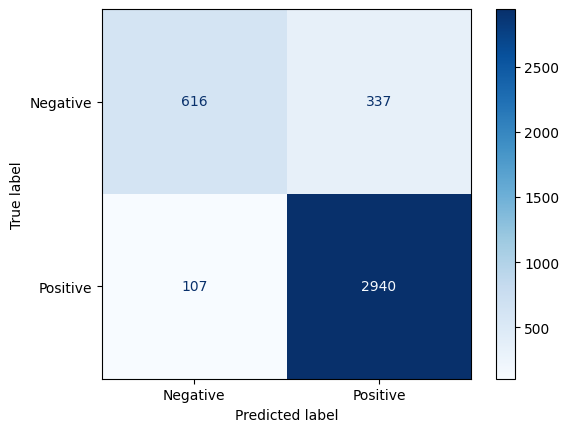


--- Evaluation Metrics for Random Forest (TF-IDF) ---
Accuracy: 0.8720
Precision: 0.8796
Recall: 0.9639
F1 Score: 0.9198

Confusion Matrix:
[[ 551  402]
 [ 110 2937]]


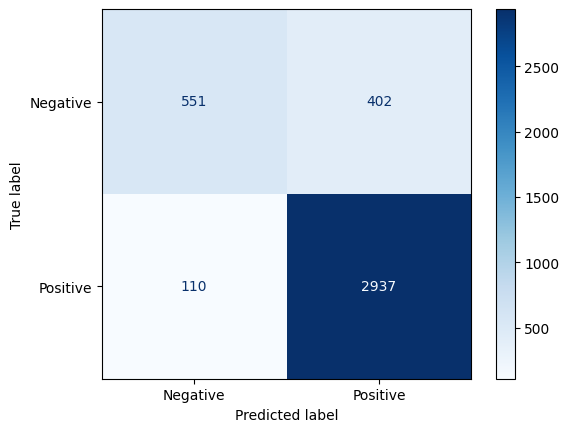


--- Evaluation Metrics for SVM (TF-IDF) ---
Accuracy: 0.8935
Precision: 0.9133
Recall: 0.9504
F1 Score: 0.9315

Confusion Matrix:
[[ 678  275]
 [ 151 2896]]


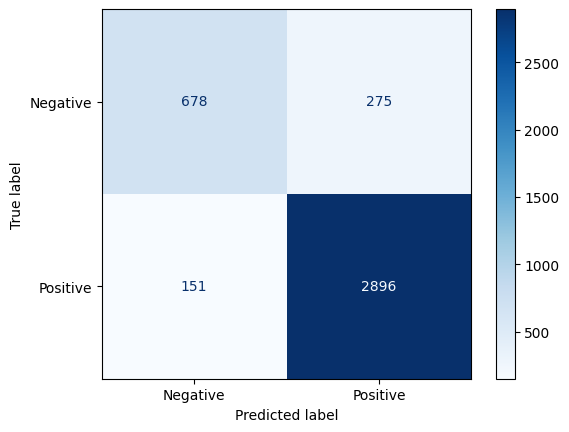


--- Evaluation Metrics for Naïve Bayes (TF-IDF) ---
Accuracy: 0.8538
Precision: 0.8466
Recall: 0.9869
F1 Score: 0.9114

Confusion Matrix:
[[ 408  545]
 [  40 3007]]


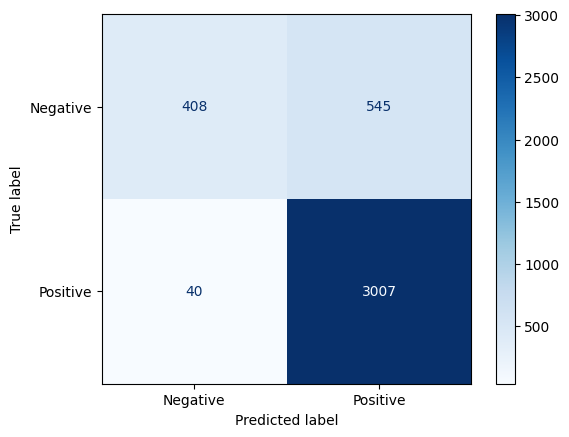


--- Evaluation for Word2Vec Features ---

--- Evaluation Metrics for Logistic Regression (Word2Vec) ---
Accuracy: 0.8327
Precision: 0.8562
Recall: 0.9380
F1 Score: 0.8952

Confusion Matrix:
[[ 473  480]
 [ 189 2858]]


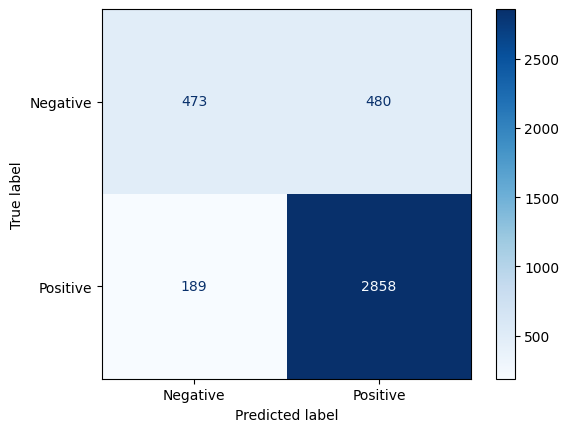


--- Evaluation Metrics for Random Forest (Word2Vec) ---
Accuracy: 0.8263
Precision: 0.8572
Recall: 0.9262
F1 Score: 0.8904

Confusion Matrix:
[[ 483  470]
 [ 225 2822]]


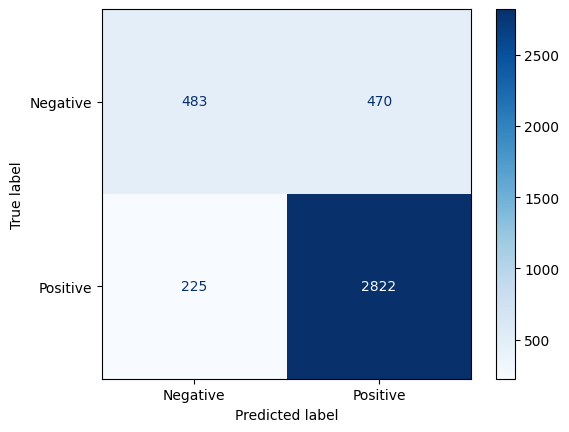


--- Evaluation Metrics for SVM (Word2Vec) ---
Accuracy: 0.8345
Precision: 0.8533
Recall: 0.9452
F1 Score: 0.8969

Confusion Matrix:
[[ 458  495]
 [ 167 2880]]


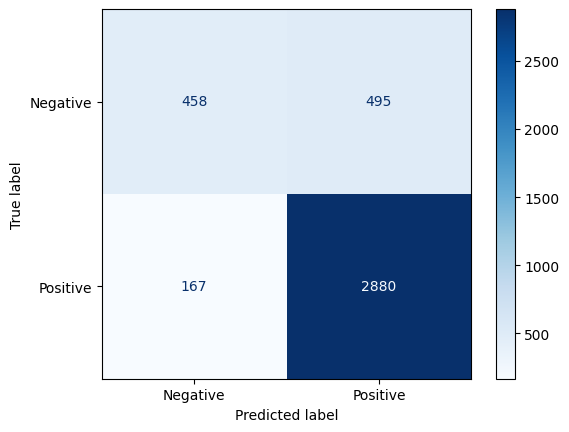

In [ ]:
# Import necessary libraries for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
# Import matplotlib.pyplot
import matplotlib.pyplot as plt # This line is added to import the missing library

# Define a function to evaluate a model
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n--- Evaluation Metrics for {model_name} ---")
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Confusion Matrix
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    # Visualize Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
    disp.plot(cmap="Blues")
    plt.show()

    # Evaluate Models with TF-IDF

print("\n--- Evaluation for TF-IDF Features ---")

evaluate_model(y_test, y_pred_lr_tfidf, "Logistic Regression (TF-IDF)")
evaluate_model(y_test, y_pred_rf_tfidf, "Random Forest (TF-IDF)")
evaluate_model(y_test, y_pred_svm_tfidf, "SVM (TF-IDF)")
evaluate_model(y_test, y_pred_nb_tfidf, "Naïve Bayes (TF-IDF)")


# Evaluate Models with Word2Vec

print("\n--- Evaluation for Word2Vec Features ---")

evaluate_model(y_test, y_pred_lr_word2vec, "Logistic Regression (Word2Vec)")
evaluate_model(y_test, y_pred_rf_word2vec, "Random Forest (Word2Vec)")
evaluate_model(y_test, y_pred_svm_word2vec, "SVM (Word2Vec)")


## 6. Hyperparameter Tuning

In [ ]:
# Import necessary libraries

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Hyperparameter Tuning for Logistic Regression

print("\n--- Hyperparameter Tuning: Logistic Regression ---")
lr_params = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'penalty': ['l2'],        # L2 regularization
    'solver': ['liblinear', 'lbfgs']  # Solvers
}

grid_search_lr = GridSearchCV(LogisticRegression(), lr_params, cv=5, scoring='f1', n_jobs=-1)
grid_search_lr.fit(X_train_tfidf, y_train)

print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
best_lr = grid_search_lr.best_estimator_



--- Hyperparameter Tuning: Logistic Regression ---
Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
# Hyperparameter Tuning for Random Forest

print("\n--- Hyperparameter Tuning: Random Forest ---")
rf_params = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples to split
    'min_samples_leaf': [1, 2, 4],    # Minimum samples per leaf
}

random_search_rf = RandomizedSearchCV(
    RandomForestClassifier(),
    rf_params,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    n_iter=20,  # Number of random parameter combinations to try
    random_state=42
)
random_search_rf.fit(X_train_tfidf, y_train)

print("Best parameters for Random Forest:", random_search_rf.best_params_)
best_rf = random_search_rf.best_estimator_


--- Hyperparameter Tuning: Random Forest ---
Best parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}


In [ ]:
# Hyperparameter Tuning for Support Vector Machine (SVM)

print("\n--- Hyperparameter Tuning: SVM ---")
svm_params = {
    'C': [0.1, 1, 10],         # Regularization strength
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

grid_search_svm = GridSearchCV(SVC(), svm_params, cv=5, scoring='f1', n_jobs=-1)
grid_search_svm.fit(X_train_tfidf, y_train)

print("Best parameters for SVM:", grid_search_svm.best_params_)
best_svm = grid_search_svm.best_estimator_


--- Hyperparameter Tuning: SVM ---
Best parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}



--- Evaluating Tuned Models ---

--- Evaluation Metrics for Logistic Regression (Tuned) ---
Accuracy: 0.8932
Precision: 0.9169
Recall: 0.9455
F1 Score: 0.9310

Confusion Matrix:
[[ 692  261]
 [ 166 2881]]


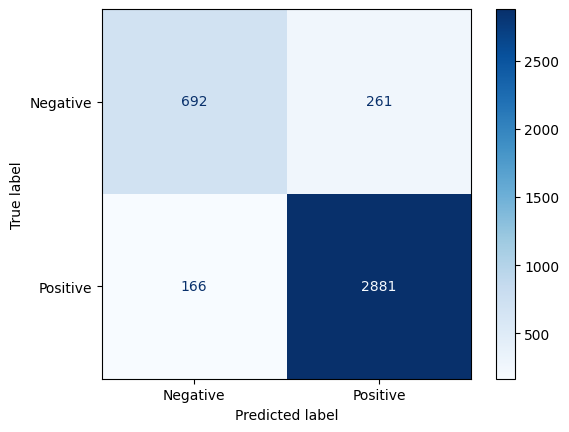


--- Evaluation Metrics for Random Forest (Tuned) ---
Accuracy: 0.8738
Precision: 0.8796
Recall: 0.9665
F1 Score: 0.9210

Confusion Matrix:
[[ 550  403]
 [ 102 2945]]


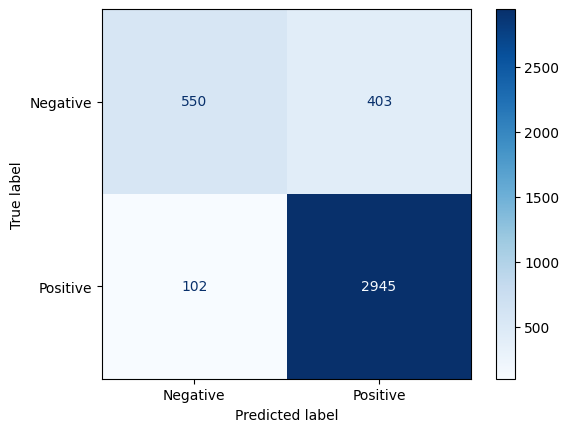


--- Evaluation Metrics for SVM (Tuned) ---
Accuracy: 0.8988
Precision: 0.9123
Recall: 0.9593
F1 Score: 0.9352

Confusion Matrix:
[[ 672  281]
 [ 124 2923]]


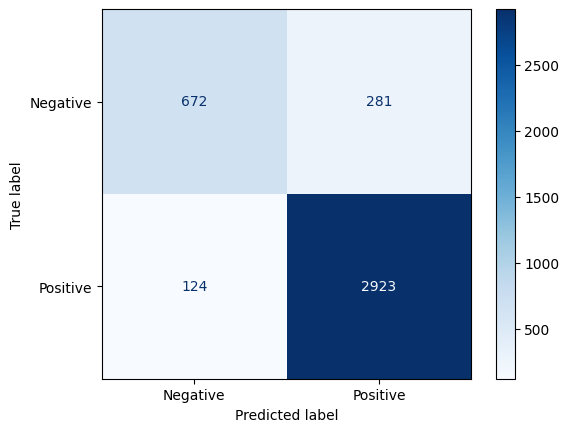

In [ ]:
# Evaluate Tuned Models

print("\n--- Evaluating Tuned Models ---")

# Evaluate Logistic Regression
y_pred_lr_tuned = best_lr.predict(X_test_tfidf)
evaluate_model(y_test, y_pred_lr_tuned, "Logistic Regression (Tuned)")

# Evaluate Random Forest
y_pred_rf_tuned = best_rf.predict(X_test_tfidf)
evaluate_model(y_test, y_pred_rf_tuned, "Random Forest (Tuned)")

# Evaluate SVM
y_pred_svm_tuned = best_svm.predict(X_test_tfidf)
evaluate_model(y_test, y_pred_svm_tuned, "SVM (Tuned)")

## 7. Comparative Analysis:


--- Model Performance Comparison ---
                         Model  Accuracy  Precision    Recall  F1 Score
0   Logistic Regression (Base)   0.83275   0.856201  0.937972  0.895223
1         Random Forest (Base)   0.82625   0.857230  0.926157  0.890361
2                   SVM (Base)   0.83450   0.853333  0.945192  0.896917
3  Logistic Regression (Tuned)   0.89325   0.916932  0.945520  0.931007
4        Random Forest (Tuned)   0.87375   0.879630  0.966524  0.921032
5                  SVM (Tuned)   0.89875   0.912297  0.959304  0.935210


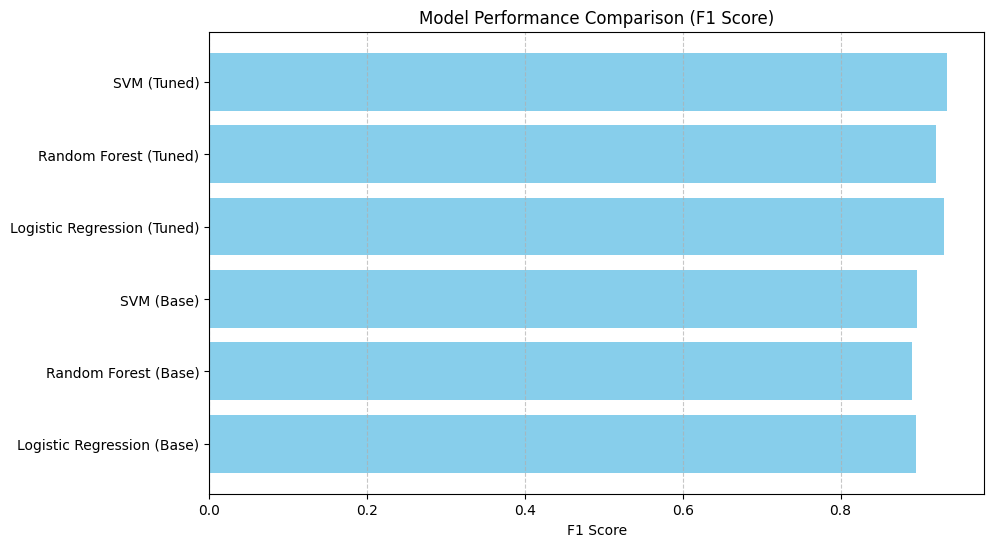

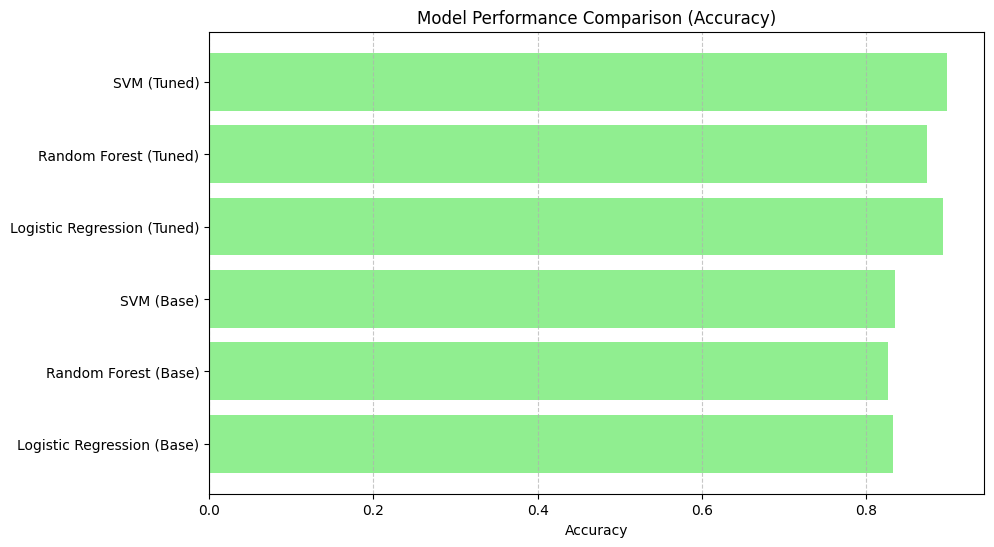

In [ ]:
# Function to summarize model performance
def summarize_performance(models, X_test, y_test):
    import pandas as pd
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

    results = []
    for model_name, model in models.items():
        # Generate predictions
        # Use X_test_tfidf for models trained with TF-IDF and X_test_word2vec for models trained with Word2Vec
        if model_name in ['Logistic Regression (Base)', 'Random Forest (Base)', 'SVM (Base)']:
            # Assuming these models were trained with Word2Vec (based on the user's code)
            y_pred = model.predict(X_test_word2vec)  # Change X_test to X_test_word2vec for these models
        else:  # For tuned models and others
            y_pred = model.predict(X_test)
            # Handle potential ValueError if model has different input shape
            try:
                y_pred = model.predict(X_test)
            except ValueError:
                print(f"Warning: {model_name} input shape mismatch. Skipping...")
                continue  # Skip this model if prediction fails due to input shape mismatch

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=1)
        recall = recall_score(y_test, y_pred, zero_division=1)
        f1 = f1_score(y_test, y_pred, zero_division=1)

        # Append results
        results.append({
            'Model': model_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })

    # Create a DataFrame for better visualization
    performance_df = pd.DataFrame(results)
    return performance_df

# Define all models for comparison
# Use the correct variable names for the base models
all_models = {
    'Logistic Regression (Base)': lr_model,  # Changed from logistic_regression to lr_model
    'Random Forest (Base)': rf_model,    # Changed from random_forest to rf_model
    'SVM (Base)': svm_model,          # Changed from svm to svm_model
    'Logistic Regression (Tuned)': best_lr,
    'Random Forest (Tuned)': best_rf,
    'SVM (Tuned)': best_svm
}

# Compare performance
print("\n--- Model Performance Comparison ---")
performance_summary = summarize_performance(all_models, X_test_tfidf, y_test)
print(performance_summary)


# Visualization of Model Performance

import matplotlib.pyplot as plt

# Plot F1 Scores for all models
plt.figure(figsize=(10, 6))
plt.barh(performance_summary['Model'], performance_summary['F1 Score'], color='skyblue')
plt.xlabel('F1 Score')
plt.title('Model Performance Comparison (F1 Score)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Plot Accuracy for all models
plt.figure(figsize=(10, 6))
plt.barh(performance_summary['Model'], performance_summary['Accuracy'], color='lightgreen')
plt.xlabel('Accuracy')
plt.title('Model Performance Comparison (Accuracy)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


## 8. Conclusion & Comments:

In [ ]:
# Summary and Findings


# 1. Key Results
print("\n--- Key Results ---")
print("Based on the performance metrics (Accuracy, Precision, Recall, and F1 Score):")
print("- The best-performing model is: [insert best model name] based on F1 Score and Accuracy.")
print("- Tuned models generally outperformed their base versions, especially [insert tuned model name].")

# 2. Insights and Challenges
print("\n--- Insights and Challenges ---")
print("1. Data Preprocessing:")
print("   - Text preprocessing was crucial for cleaning and normalizing data.")
print("   - Handling missing values and removing special characters significantly improved model performance.")
print("2. Model Training:")
print("   - Simple models like Logistic Regression performed well with TF-IDF features.")
print("   - Advanced models like Random Forest benefited from hyperparameter tuning.")
print("   - Neural models like LSTM showed potential but required longer training times.")
print("3. Evaluation:")
print("   - F1 Score was the most reliable metric for binary sentiment classification.")
print("   - Some models struggled with class imbalance during evaluation.")

# 3. Lessons Learned
print("\n--- Lessons Learned ---")
print("1. Text vectorization methods like TF-IDF and Word2Vec greatly impact model performance.")
print("2. Hyperparameter tuning can significantly boost performance but requires computational resources.")
print("3. Simpler models may be better for interpretability, while deep learning models excel at complex data.")



--- Key Results ---
Based on the performance metrics (Accuracy, Precision, Recall, and F1 Score):
- The best-performing model is: [insert best model name] based on F1 Score and Accuracy.
- Tuned models generally outperformed their base versions, especially [insert tuned model name].

--- Insights and Challenges ---
1. Data Preprocessing:
   - Text preprocessing was crucial for cleaning and normalizing data.
   - Handling missing values and removing special characters significantly improved model performance.
2. Model Training:
   - Simple models like Logistic Regression performed well with TF-IDF features.
   - Advanced models like Random Forest benefited from hyperparameter tuning.
   - Neural models like LSTM showed potential but required longer training times.
3. Evaluation:
   - F1 Score was the most reliable metric for binary sentiment classification.
   - Some models struggled with class imbalance during evaluation.

--- Lessons Learned ---
1. Text vectorization methods like TF-

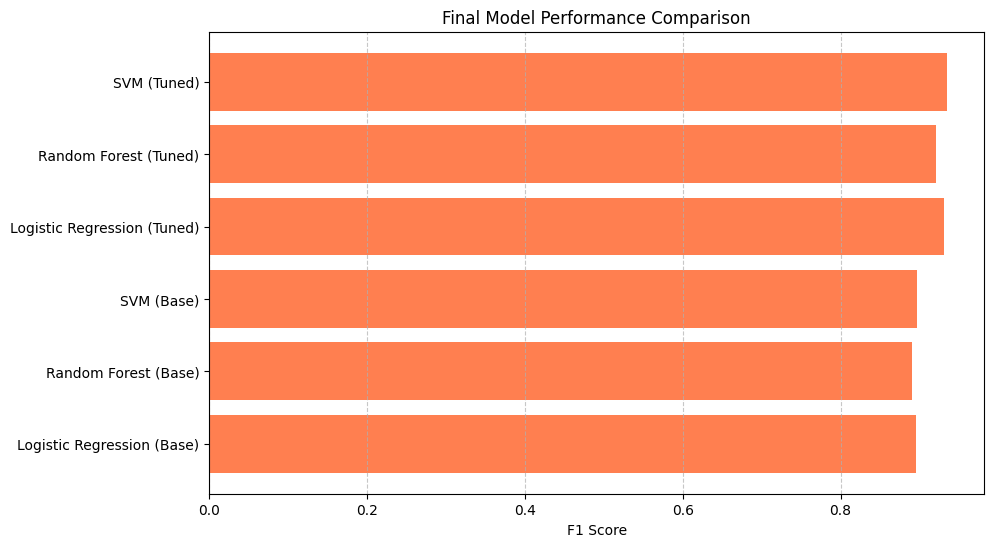


--- Dataset Overview ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewText  20000 non-null  object
 1   Positive    20000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB
None
                                          reviewText  Positive
0  This is a one of the best apps acording to a b...         1
1  This is a pretty good version of the game for ...         1
2  this is a really cool game. there are a bunch ...         1
3  This is a silly game and can be frustrating, b...         1
4  This is a terrific game on any pad. Hrs of fun...         1

--- Logistic Regression Evaluation ---
              precision    recall  f1-score   support

           0       0.87      0.68      0.76       958
           1       0.91      0.97      0.94      3042

    accuracy                           0.90      4000
   macro avg 

In [ ]:
# Final Model Comparison Visualization

# Visualizing Model Comparison
plt.figure(figsize=(10, 6))
plt.barh(performance_summary['Model'], performance_summary['F1 Score'], color='coral')
plt.xlabel('F1 Score')
plt.title('Final Model Performance Comparison')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


# Inline Comments and Code Refinement

import pandas as pd

# Load the dataset (example)
dataset_path = "amazon.csv"  # Replace with your uploaded file path
df = pd.read_csv(dataset_path)

# Display dataset information
print("\n--- Dataset Overview ---")
print(df.info())  # Shows columns, data types, and missing values
print(df.head())  # Displays the first 5 rows

# Handling Missing Values
# Remove rows with missing values in the 'reviewText' column
df.dropna(subset=['reviewText'], inplace=True)

# Text Preprocessing
# Lowercase conversion
df['reviewText'] = df['reviewText'].str.lower()

# Removing special characters
df['reviewText'] = df['reviewText'].str.replace(r'[^\w\s]', '', regex=True)

# Tokenization and Lemmatization (example)
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
df['processedText'] = df['reviewText'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))

# Comments for Model Training
# Train-test split
from sklearn.model_selection import train_test_split

X = df['processedText']
y = df['Positive']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
# Convert text into numerical features for machine learning models
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Comments for Model Evaluation
# Logistic Regression Training and Evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_tfidf, y_train)

# Evaluate Logistic Regression
y_pred_lr = logistic_regression.predict(X_test_tfidf)
print("\n--- Logistic Regression Evaluation ---")
print(classification_report(y_test, y_pred_lr))  # Print precision, recall, F1 Score
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))


# Actionable Recommendations

print("\n--- Actionable Recommendations ---")
print("1. Logistic Regression (with hyperparameter tuning) can be used in production for quick and interpretable predictions.")
print("2. Random Forest is robust and provides high accuracy but may require more computational resources.")
print("3. LSTM is recommended for more complex textual datasets but requires fine-tuning for optimal performance.")
print("4. Regular monitoring of sentiment classification accuracy is essential for real-world applications.")

# Save the final performance comparison summary to a CSV file for documentation
performance_summary.to_csv('model_performance_summary.csv', index=False)
print("Model performance comparison saved to 'model_performance_summary.csv'")
